In [0]:
#Importing the libraries Requiered

import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#importing and merging the data for the ease of prediction  
data_train = pd.read_excel('Data_Train.xlsx')
data_test=pd.read_excel('Data_Test.xlsx')
df=pd.concat([data_train,data_test])

In [635]:
#Reading the Data
df.head(20)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [636]:
#Dropping the Nan values in the dataset
df.dropna

<bound method DataFrame.dropna of                                                    Name  ...  Price
0                                Maruti Wagon R LXI CNG  ...   1.75
1                      Hyundai Creta 1.6 CRDi SX Option  ...  12.50
2                                          Honda Jazz V  ...   4.50
3                                     Maruti Ertiga VDI  ...   6.00
4                       Audi A4 New 2.0 TDI Multitronic  ...  17.74
...                                                 ...  ...    ...
1229                  Volkswagen Vento Diesel Trendline  ...    NaN
1230                             Volkswagen Polo GT TSI  ...    NaN
1231                             Nissan Micra Diesel XV  ...    NaN
1232                             Volkswagen Polo GT TSI  ...    NaN
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...  ...    NaN

[7253 rows x 12 columns]>

In [637]:
df.iloc[4446]

Name                 Mahindra E Verito D4
Location                          Chennai
Year                                 2016
Kilometers_Driven                   50000
Fuel_Type                        Electric
Transmission                    Automatic
Owner_Type                          First
Mileage                               NaN
Engine                              72 CC
Power                              41 bhp
Seats                                   5
Price                                  13
Name: 4446, dtype: object

Cleaning the Data With Extra Ingredients

In [0]:
#Changing the name fot the ease of using the name
df["Name"] = df["Name"].str.replace(r'Land Rover', "Land_Rover");

In [0]:
df["Engine"] = df["Engine"].str.replace(r' CC', " ");

In [0]:
df["Power"] = df["Power"].str.replace(r' bhp', " ");

In [0]:
df["Mileage"] = df["Mileage"].str.replace(r' km/kg', " kmpl");

In [0]:
df["Mileage"] = df["Mileage"].str.replace(r' kmpl', " ");

In [643]:
df.head(15)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1,814,55.2,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.1,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.5,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598,103.6,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3,1248,74,5.0,1.95


In [0]:
data=pd.get_dummies(data,drop_first=True)

In [645]:
df.shape

(7253, 12)

In [646]:
#Droppinng the null values and checking if any left
df.dropna(inplace = True)  
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [647]:
#Checking the corrlation in the data set
print(df.corr())

                       Year  Kilometers_Driven     Seats     Price
Year               1.000000          -0.172663  0.012338  0.305800
Kilometers_Driven -0.172663           1.000000  0.083101 -0.011263
Seats              0.012338           0.083101  1.000000  0.052262
Price              0.305800          -0.011263  0.052262  1.000000


In [0]:
#Assigning the data to x var.
x = df

In [649]:
x.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [650]:
x.describe()

,Year,Kilometers_Driven,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,5.278828,9.501647
std,3.247238,9.155851e+04,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.390800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [651]:
len(x)

5975

In [652]:
#Checking the data info
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [653]:
x["Engine"].value_counts()

1197     606
1248     512
1498     303
998      259
2179     240
        ... 
2487       1
2995       1
2773       1
4951       1
2720       1
Name: Engine, Length: 145, dtype: int64

In [654]:
x.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [0]:
#Splitting the name column and assigning the company name to w var
w = x.Name.str.split(" ", expand= True)
x["Comp_Name"] = w[0] #Using the company name in the x data

In [656]:
w.head()

,0,1,2,3,4,5,6,7,8,9
0,Maruti,Wagon,R,LXI,CNG,None,None,None,None,None
1,Hyundai,Creta,1.6,CRDi,SX,Option,None,None,None,None
2,Honda,Jazz,V,None,None,None,None,None,None,None
3,Maruti,Ertiga,VDI,None,None,None,None,None,None,None
4,Audi,A4,New,2.0,TDI,Multitronic,None,None,None,None


# DATA VISUALISATION

Visualising data with different aspects with price and other columns

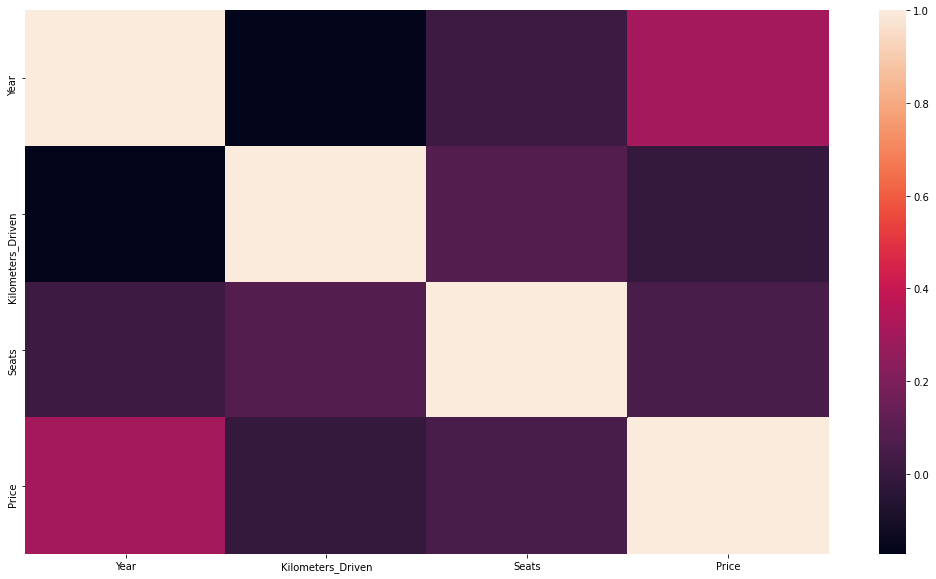

In [657]:
sns.heatmap(x.corr());

In [658]:
x["Comp_Name"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land_Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

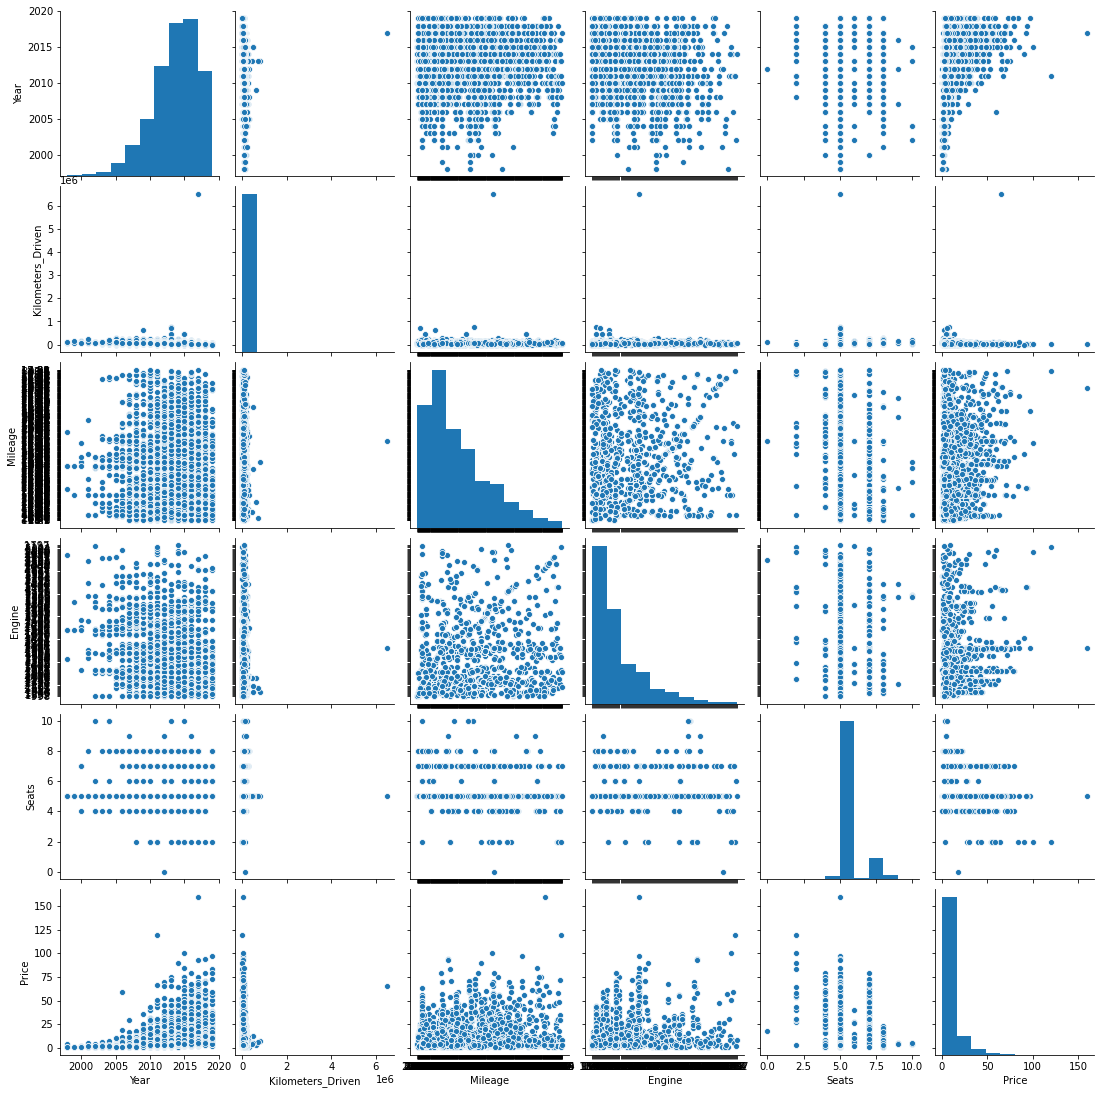

In [659]:
sns.pairplot(x)
plt.show()

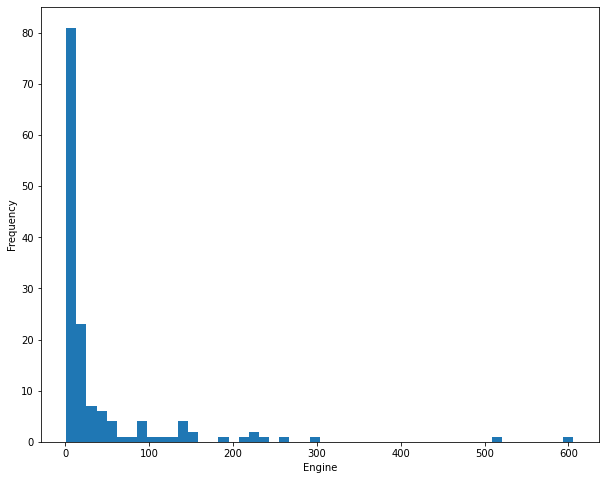

In [660]:
plt.figure(figsize=(10,8))
x['Engine'].value_counts().plot.hist(bins=50)
plt.xlabel("Engine")
plt.show()

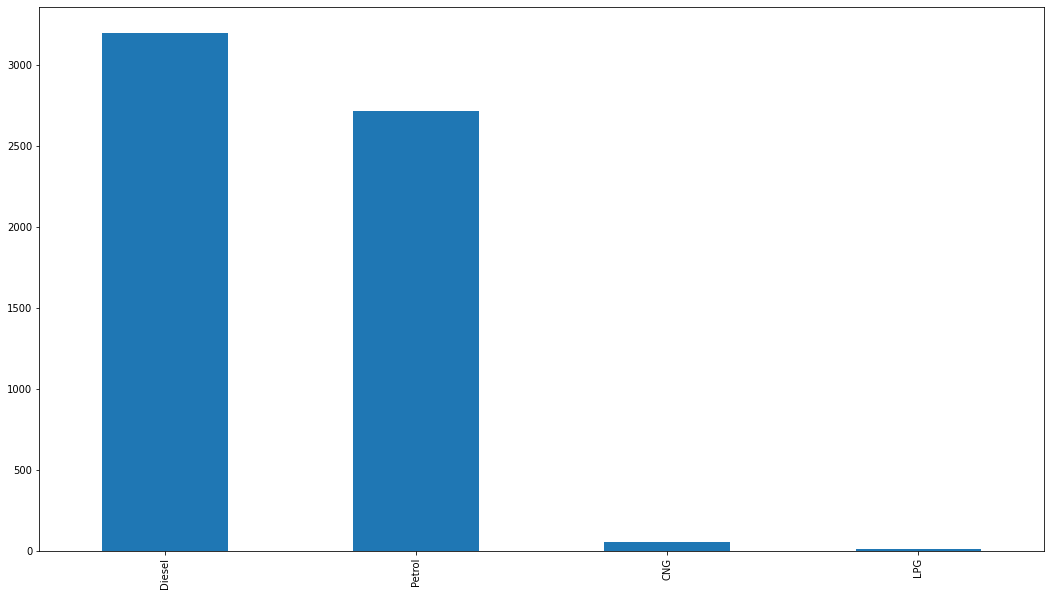

In [661]:
x['Fuel_Type'].value_counts().plot(kind='bar')

(0.0, 110.0)

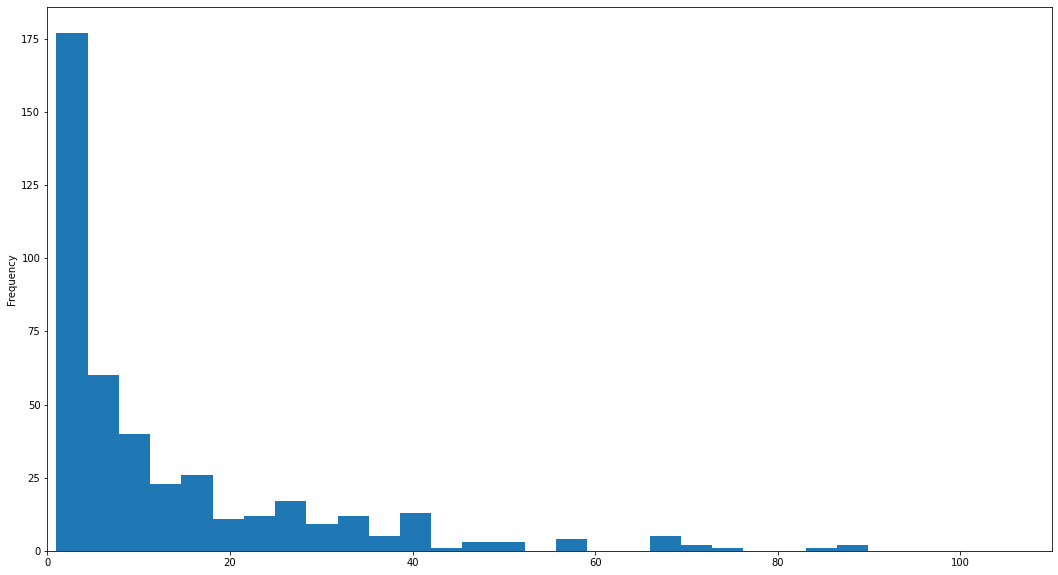

In [662]:
x['Mileage'].value_counts().plot.hist(bins=50)
plt.xlim(0,110)

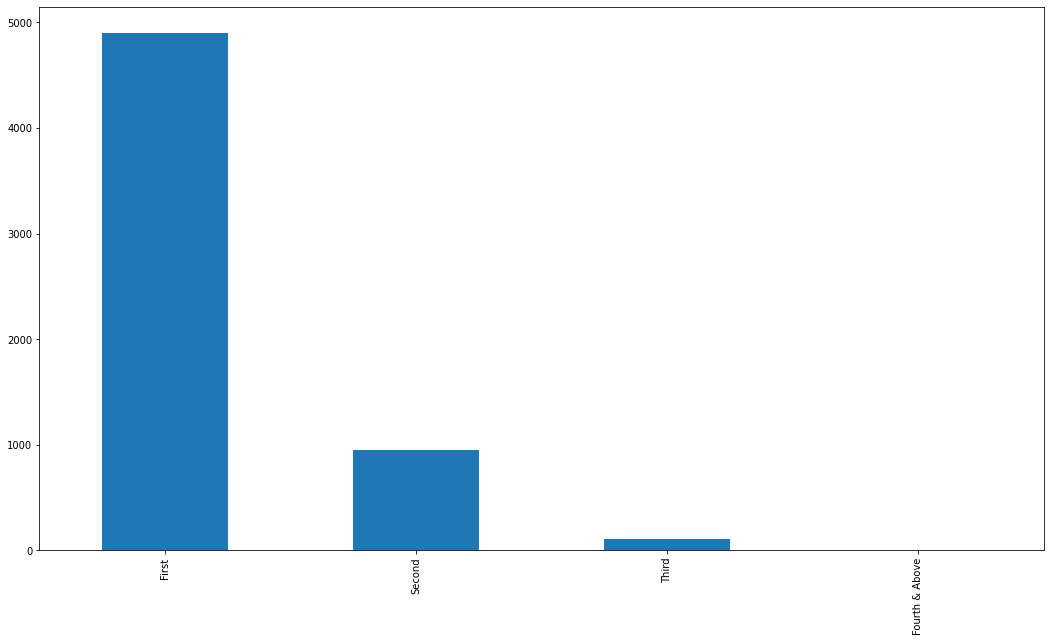

In [663]:
x['Owner_Type'].value_counts().plot(kind='bar')

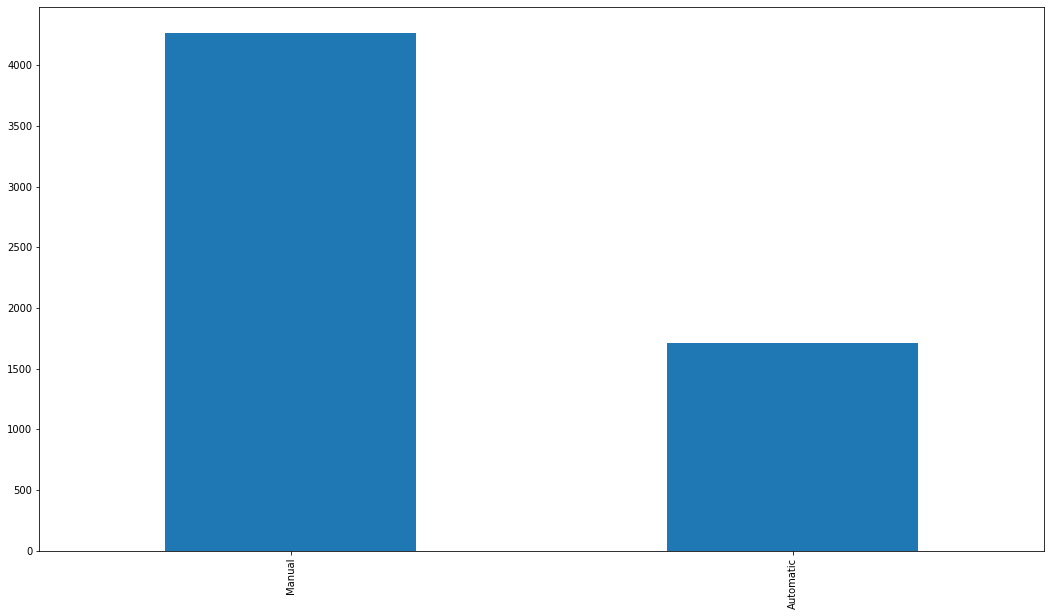

In [664]:
x['Transmission'].value_counts().plot(kind='bar')

In [0]:
cols = x.columns
num_cols = x._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

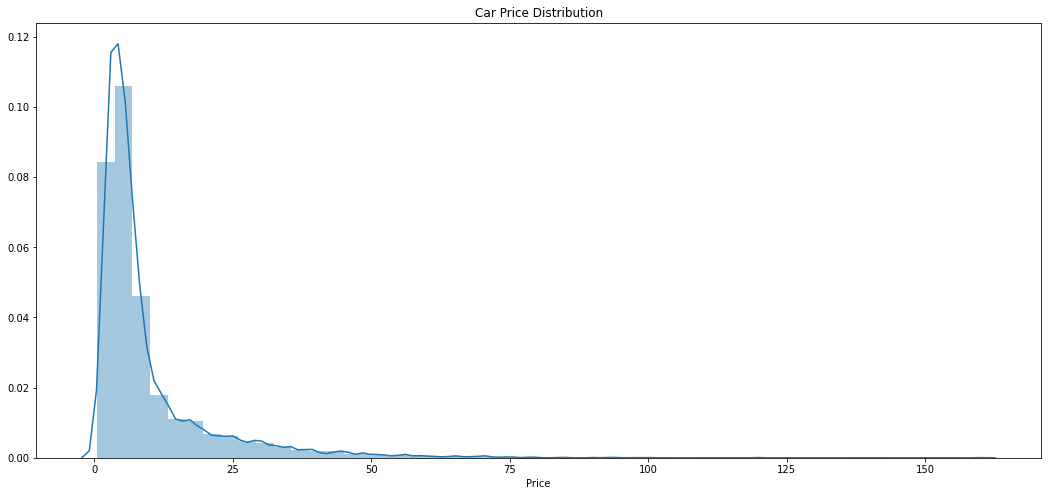

In [666]:
plt.figure(figsize = (18,8))
plt.title("Car Price Distribution")
sns.distplot(x['Price'])

Text(0, 0.5, 'Counts Cars')

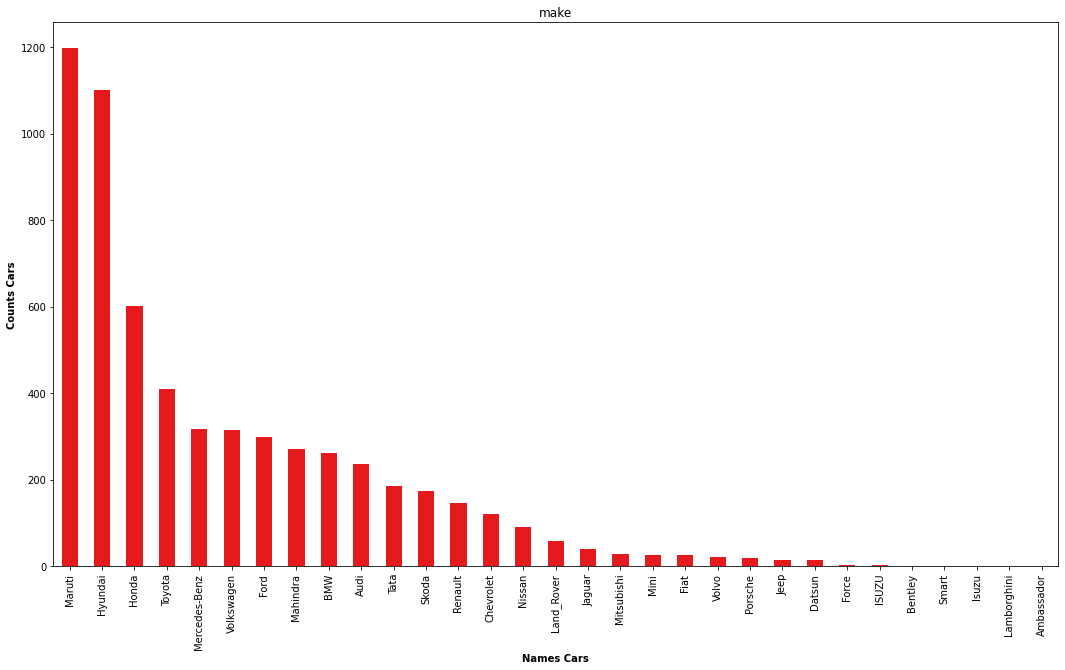

In [667]:
plt.rcParams['figure.figsize'] = [18,10]
ax = x["Comp_Name"].value_counts().plot(kind = 'bar', stacked = True, colormap = 'Set1')
ax.title.set_text('make')
plt.xlabel("Names Cars", fontweight = 'bold')
plt.ylabel("Counts Cars", fontweight = 'bold')

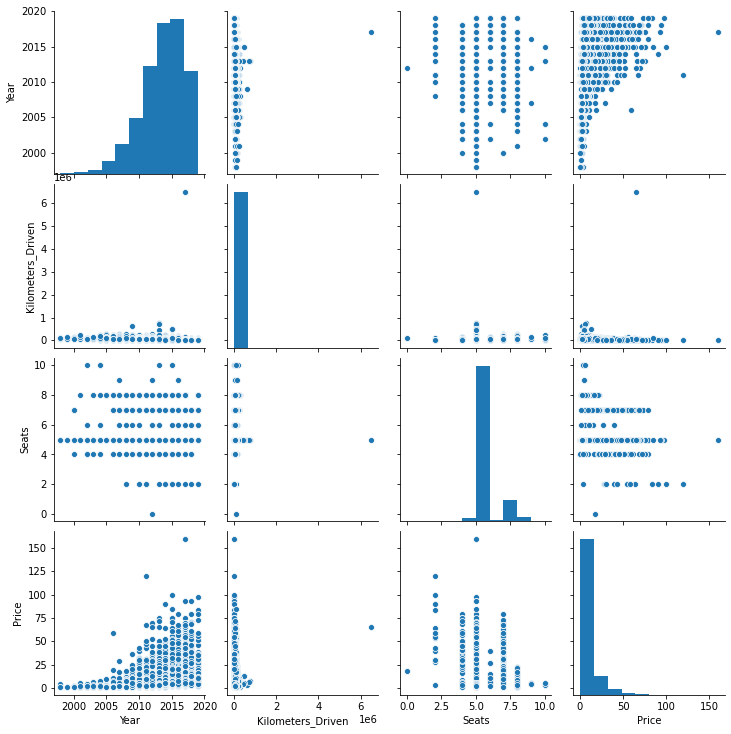

In [668]:
ax = sns.pairplot(x[num_cols])

Dividing the data to categorical and numerical format

In [669]:
x[cat_cols]

,Name,Mileage,Fuel_Type,Engine,Location,Transmission,Owner_Type,Comp_Name,Power
0,Maruti Wagon R LXI CNG,26.6,CNG,998,Mumbai,Manual,First,Maruti,58.16
1,Hyundai Creta 1.6 CRDi SX Option,19.67,Diesel,1582,Pune,Manual,First,Hyundai,126.2
2,Honda Jazz V,18.2,Petrol,1199,Chennai,Manual,First,Honda,88.7
3,Maruti Ertiga VDI,20.77,Diesel,1248,Chennai,Manual,First,Maruti,88.76
4,Audi A4 New 2.0 TDI Multitronic,15.2,Diesel,1968,Coimbatore,Automatic,Second,Audi,140.8
...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,28.4,Diesel,1248,Delhi,Manual,First,Maruti,74
6015,Hyundai Xcent 1.1 CRDi S,24.4,Diesel,1120,Jaipur,Manual,First,Hyundai,71
6016,Mahindra Xylo D4 BSIV,14.0,Diesel,2498,Jaipur,Manual,Second,Mahindra,112
6017,Maruti Wagon R VXI,18.9,Petrol,998,Kolkata,Manual,First,Maruti,67.1


In [670]:
x[num_cols]

,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74
...,...,...,...,...
6014,2014,27365,5.0,4.75
6015,2015,100000,5.0,4.00
6016,2012,55000,8.0,2.90
6017,2013,46000,5.0,2.65


Representing the numerical and categorical data in graph

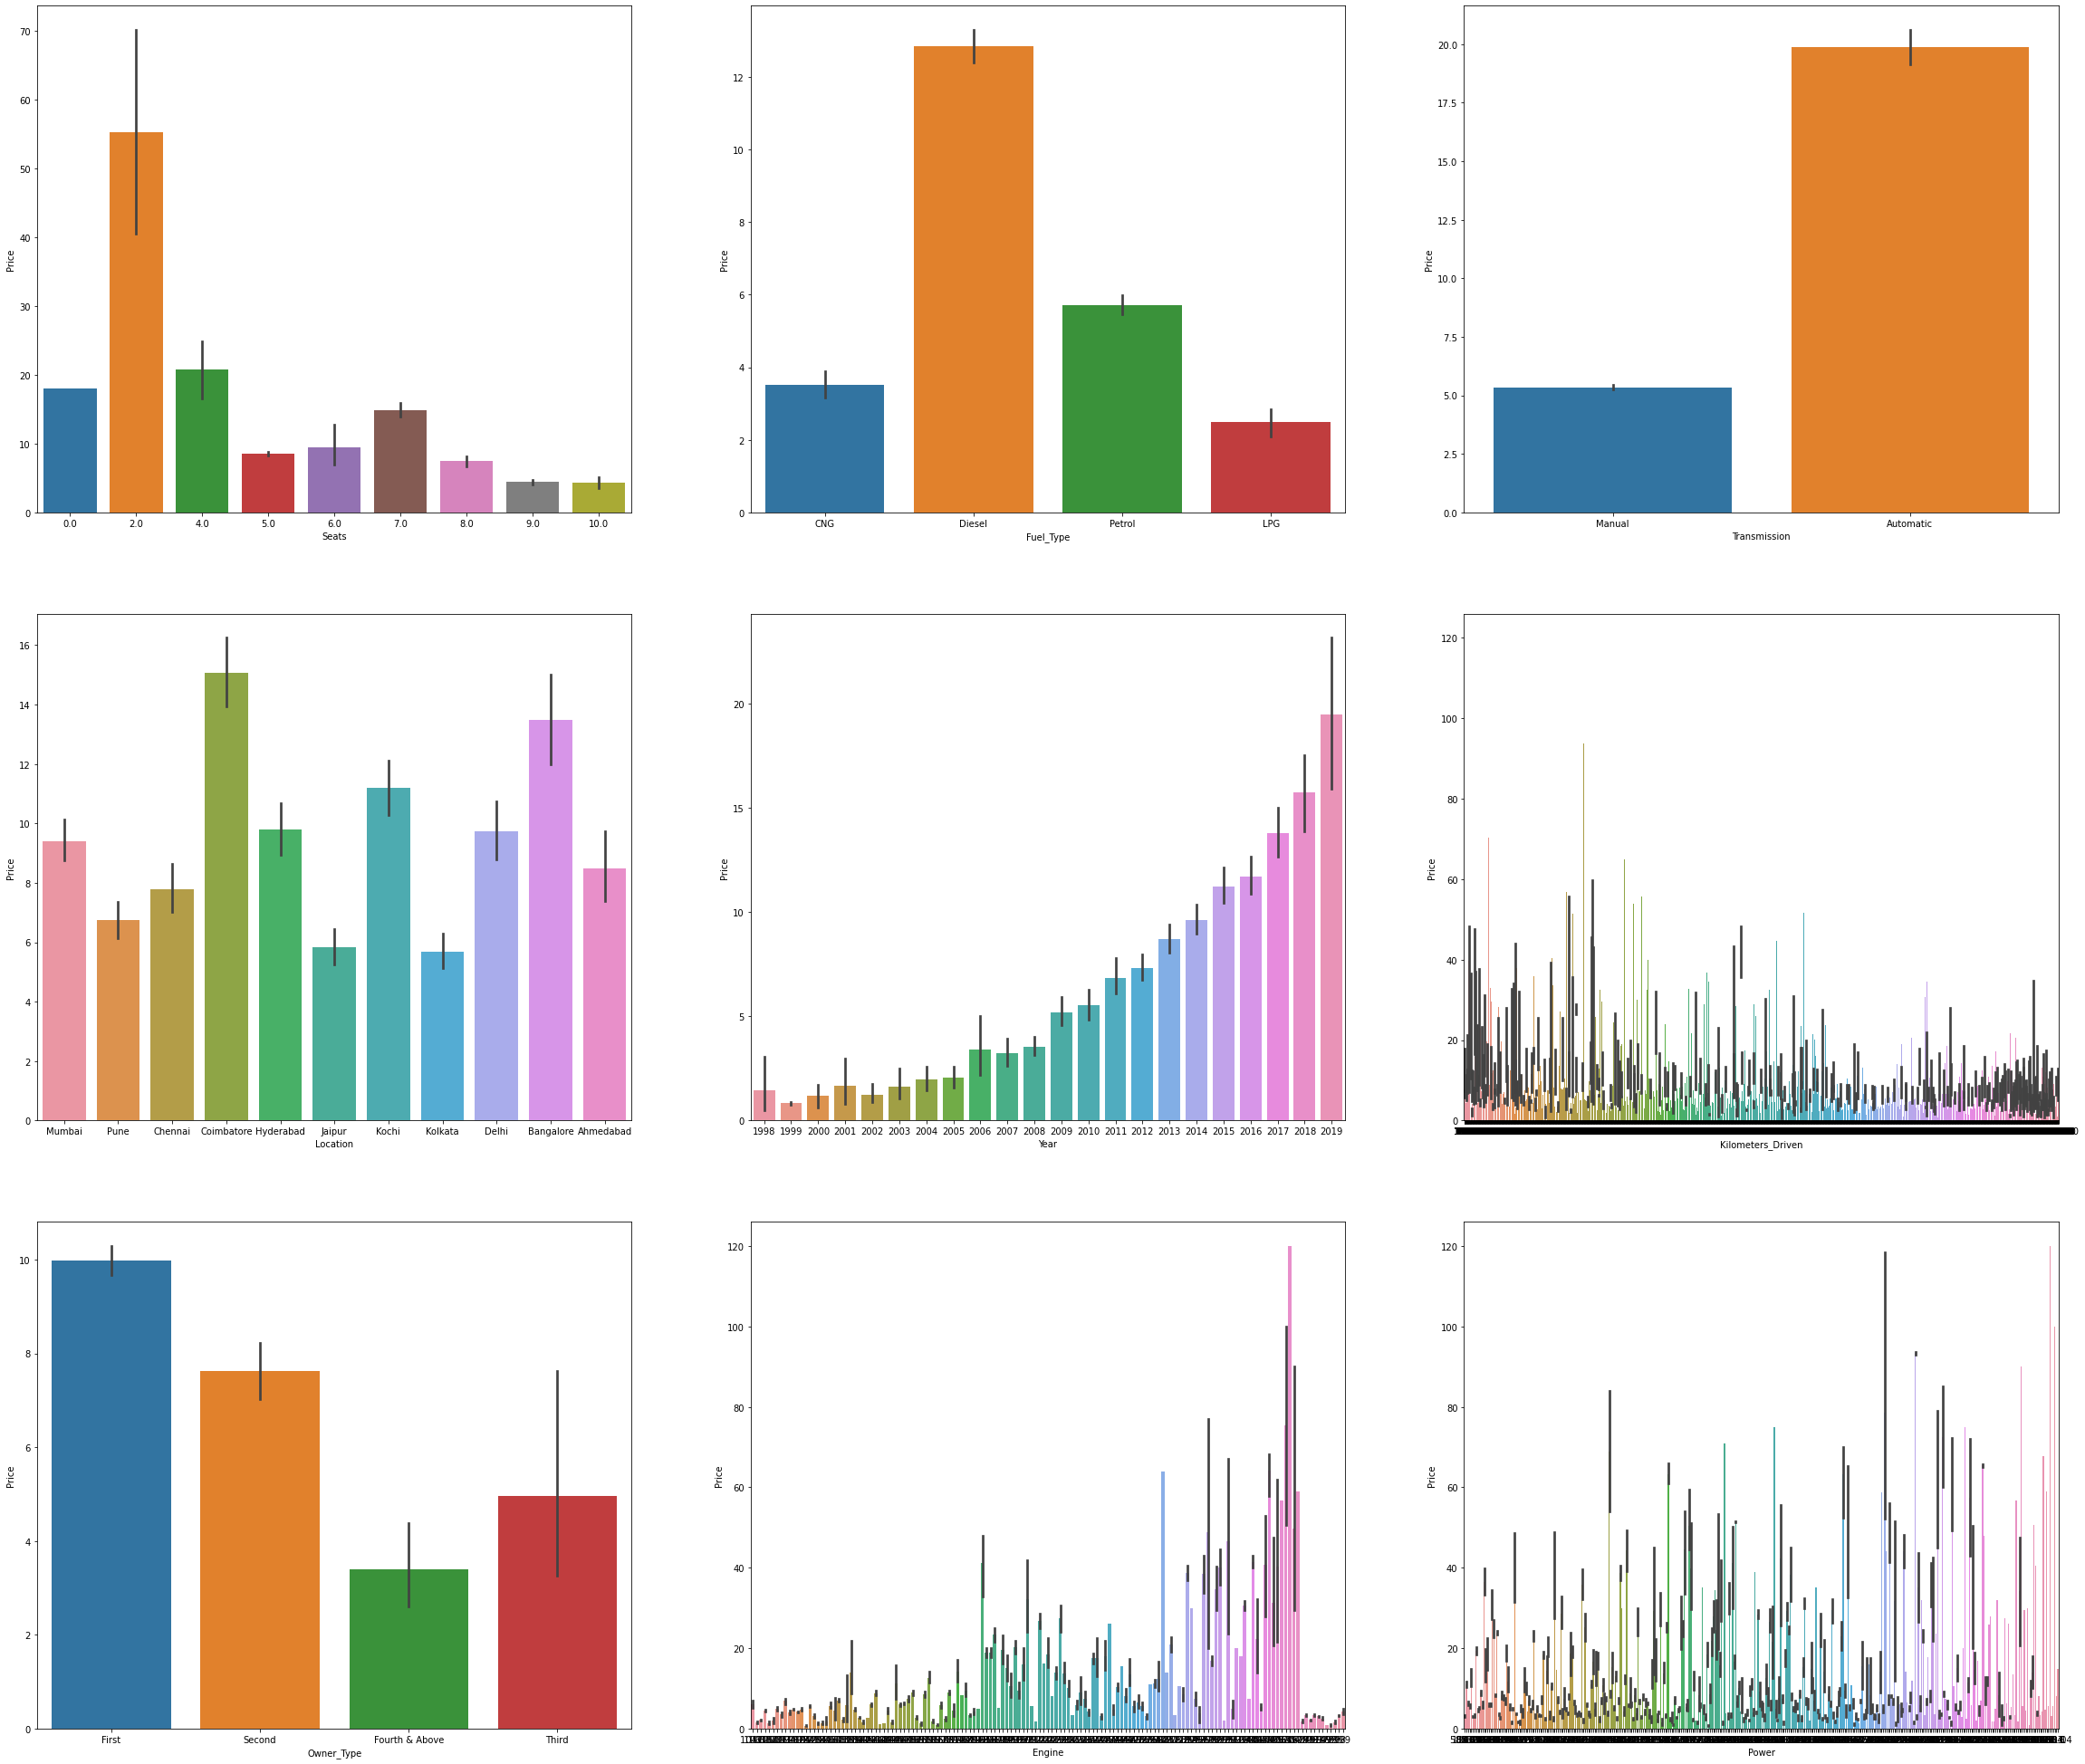

In [671]:
plt.figure(figsize=(40,35))
plt.subplot(3,3,1)
sns.barplot(x = 'Seats', y = 'Price', data = x)
plt.subplot(3,3,2)
sns.barplot(x = 'Fuel_Type', y = 'Price', data = x)
plt.subplot(3,3,3)
sns.barplot(x = 'Transmission', y = 'Price', data = x)
plt.subplot(3,3,4)
sns.barplot(x = 'Location', y = 'Price', data = x)
plt.subplot(3,3,5)
sns.barplot(x = 'Year', y = 'Price', data = x)
plt.subplot(3,3,6)
sns.barplot(x = 'Kilometers_Driven', y = 'Price', data = x)
plt.subplot(3,3,7)
sns.barplot(x = 'Owner_Type', y = 'Price', data = x)
plt.subplot(3,3,8)
sns.barplot(x = 'Engine', y = 'Price', data = x)
plt.subplot(3,3,9)
sns.barplot(x = 'Power', y = 'Price', data = x)

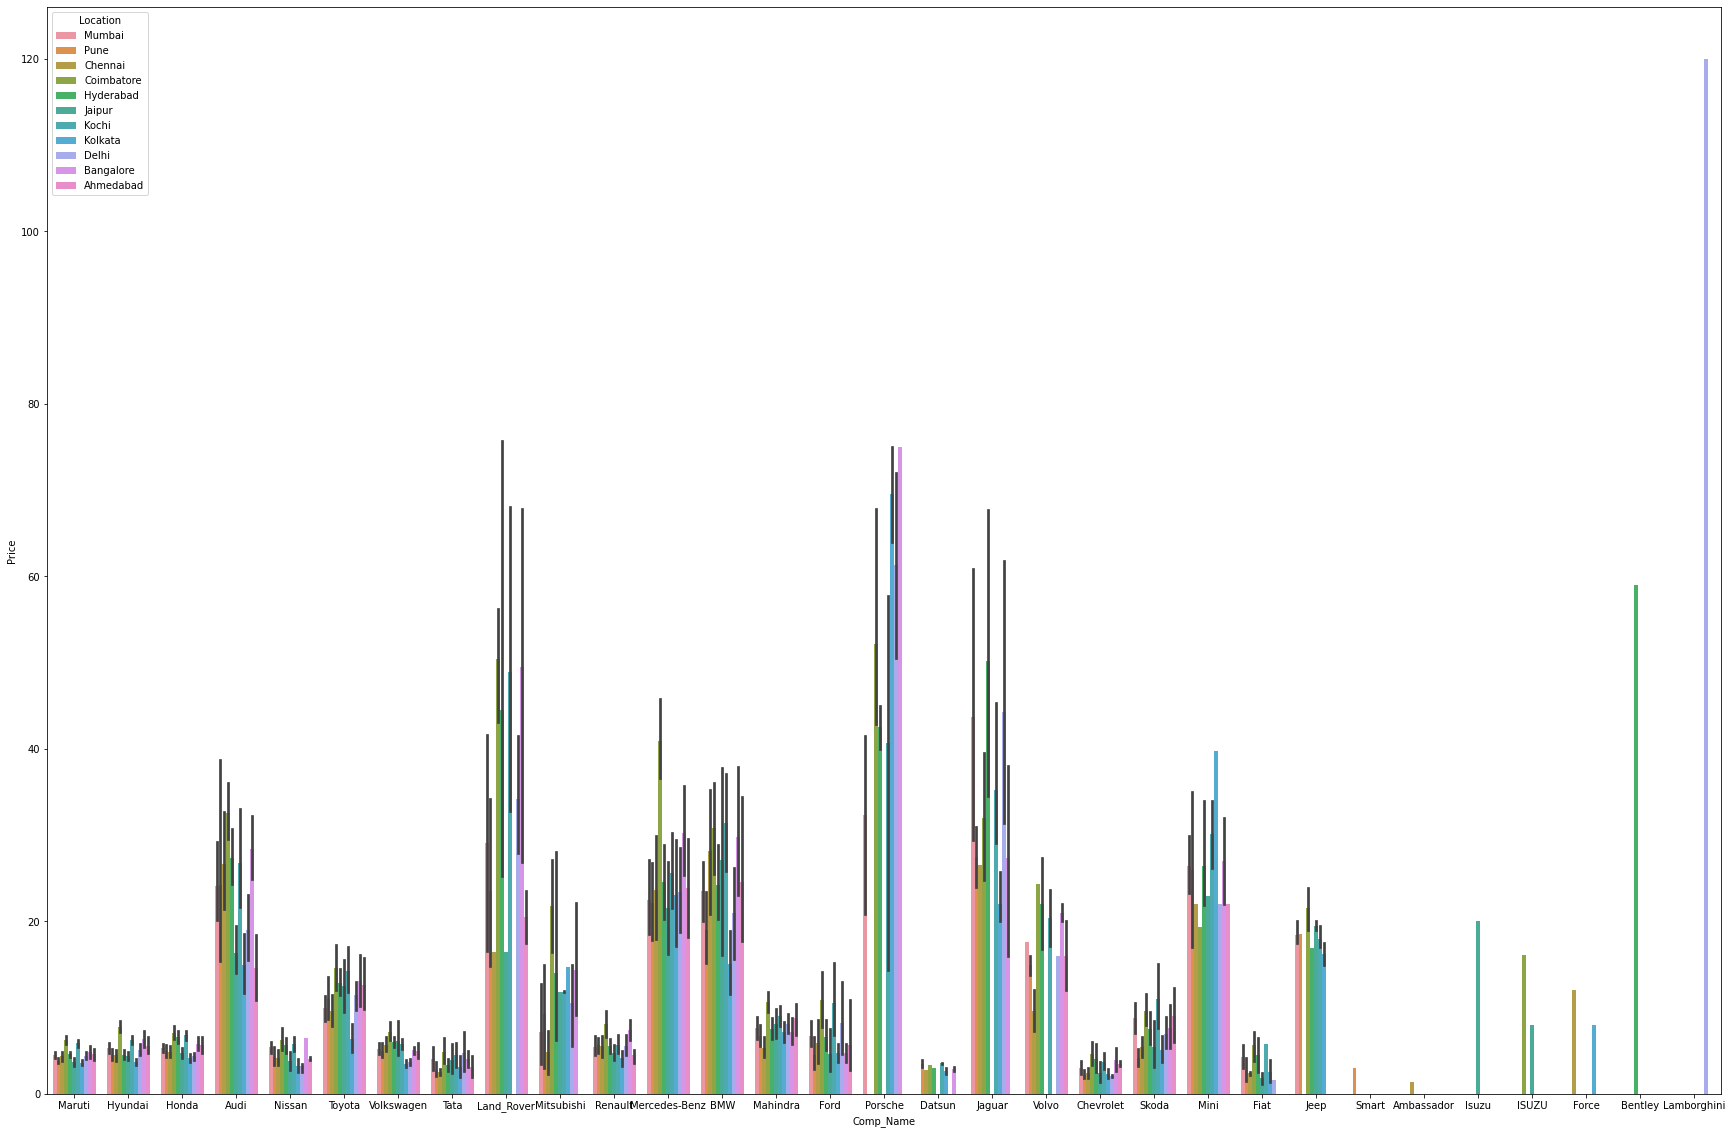

In [672]:
plt.figure(figsize=(30,20))
sns.barplot(x = "Comp_Name", y = "Price", hue = "Location" , data = x) 
plt.show()

<Figure size 1440x432 with 0 Axes>

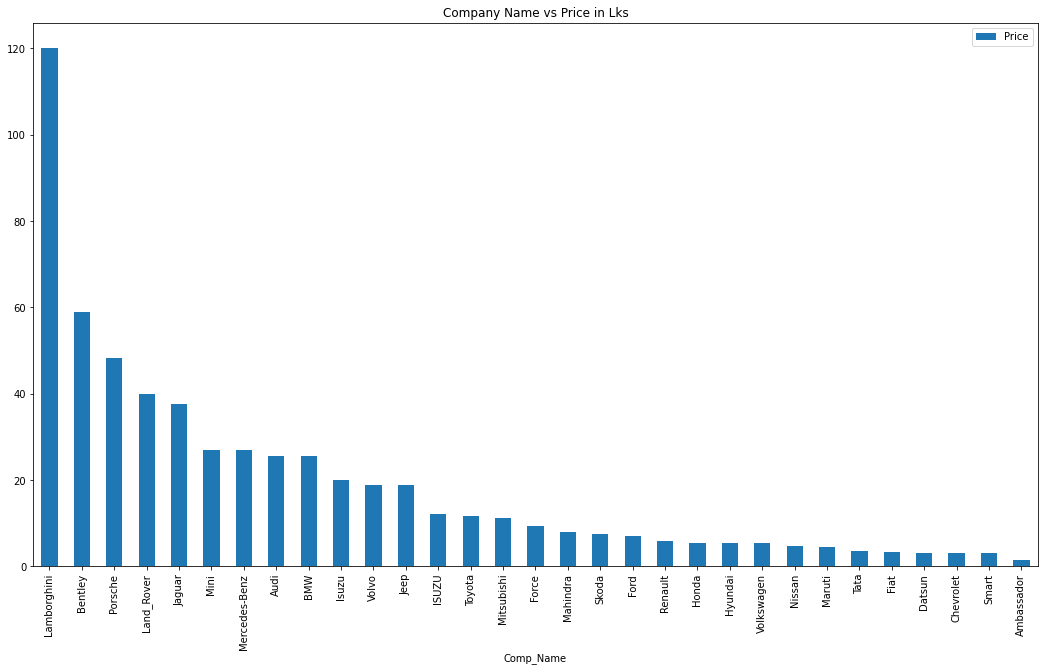

In [673]:
plt.figure(figsize= (20,6))
x_autox = pd.DataFrame(x.groupby(['Comp_Name'])["Price"].mean().sort_values(ascending = False))
x_autox.plot.bar()
plt.title("Company Name vs Price in Lks")
plt.show()

<Figure size 1440x432 with 0 Axes>

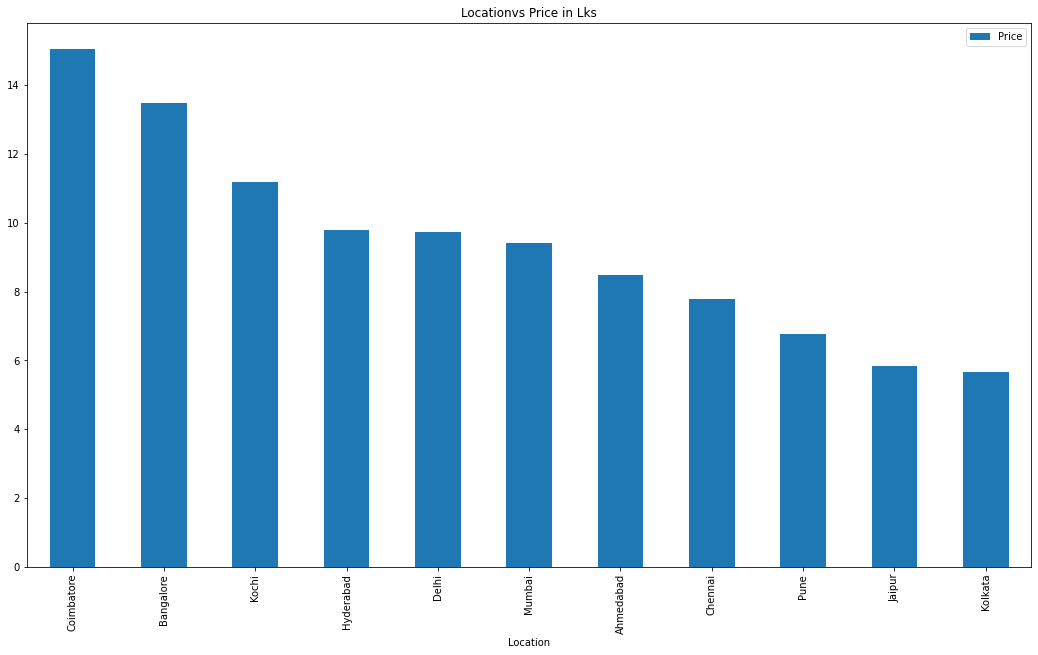

In [674]:
plt.figure(figsize= (20,6))
x_autox = pd.DataFrame(x.groupby(['Location'])["Price"].mean().sort_values(ascending = False))
x_autox.plot.bar()
plt.title("Locationvs Price in Lks")
plt.show()

<Figure size 1440x432 with 0 Axes>

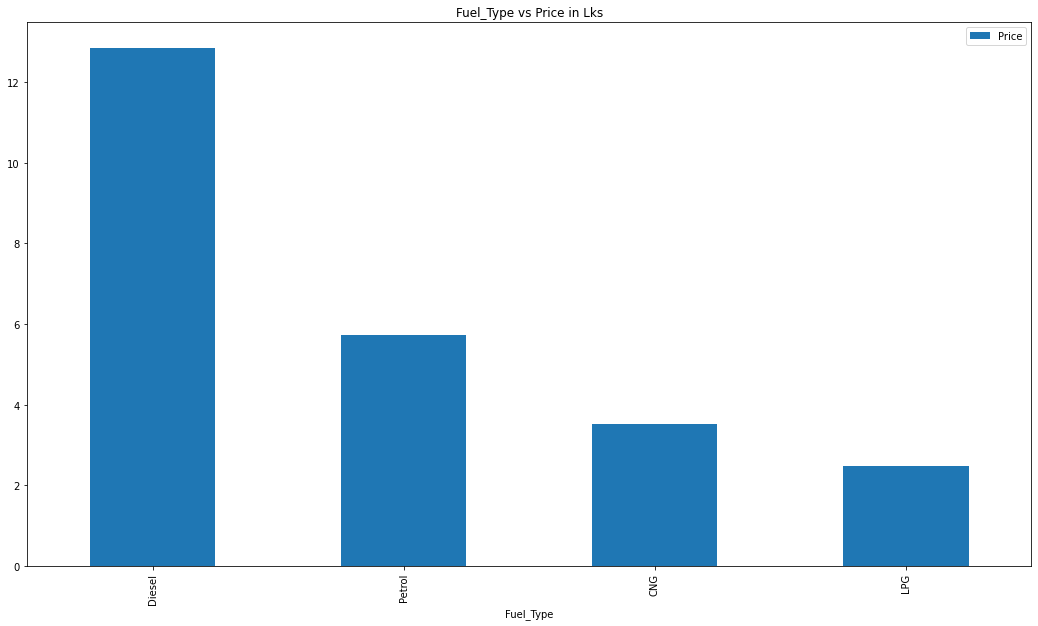

In [675]:
plt.figure(figsize= (20,6))
x_autox = pd.DataFrame(x.groupby(['Fuel_Type'])["Price"].mean().sort_values(ascending = False))
x_autox.plot.bar()
plt.title("Fuel_Type vs Price in Lks")
plt.show()

In [676]:
#Binning the Car Companies based on avg prices of each Company.
x['Price'] = x['Price'].astype('int')
temp = x.copy()
table = temp.groupby(['Comp_Name'])['Price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='Comp_Name')
bins = [0,15,40,60]
x_bin=['Average','Medium','Highend']
x['Range_of_Car'] = pd.cut(temp['Price_y'],bins,right=False,labels=x_bin)
x.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Comp_Name,Range_of_Car
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1,Maruti,Average
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12,Hyundai,Average
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4,Honda,Average
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6,Maruti,Average
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17,Audi,Medium


Converting the data in numerical form for the ease of manipulation

In [677]:
x['Ftype'] = pd.factorize(x.Fuel_Type)[0]
print(x['Fuel_Type'])
print(x['Ftype'].value_counts())


0          CNG
1       Diesel
2       Petrol
3       Diesel
4       Diesel
         ...  
6014    Diesel
6015    Diesel
6016    Diesel
6017    Petrol
6018    Diesel
Name: Fuel_Type, Length: 5975, dtype: object
1    3195
2    2714
0      56
3      10
Name: Ftype, dtype: int64


In [678]:
x['CName'] = pd.factorize(x.Comp_Name)[0]
print(x['Comp_Name'])
print(x['CName'].value_counts())

0          Maruti
1         Hyundai
2           Honda
3          Maruti
4            Audi
          ...    
6014       Maruti
6015      Hyundai
6016     Mahindra
6017       Maruti
6018    Chevrolet
Name: Comp_Name, Length: 5975, dtype: object
0     1197
1     1100
2      601
5      409
11     318
6      315
14     298
13     271
12     262
3      236
7      186
20     173
10     145
19     121
4       91
8       57
17      40
9       27
21      26
22      25
18      21
15      18
23      15
16      13
28       3
27       2
24       1
25       1
26       1
30       1
29       1
Name: CName, dtype: int64


In [679]:
x['OWNER_TYPE'] = pd.factorize(x.Owner_Type)[0]
print(x['Owner_Type'])
print(x['OWNER_TYPE'].value_counts())

0        First
1        First
2        First
3        First
4       Second
         ...  
6014     First
6015     First
6016    Second
6017     First
6018     First
Name: Owner_Type, Length: 5975, dtype: object
0    4903
1     953
3     111
2       8
Name: OWNER_TYPE, dtype: int64


In [680]:
x['Budget'] = pd.factorize(x.Range_of_Car)[0]
print(x['Range_of_Car'])
print(x['Budget'].value_counts())

0       Average
1       Average
2       Average
3       Average
4        Medium
         ...   
6014        NaN
6015        NaN
6016        NaN
6017        NaN
6018        NaN
Name: Range_of_Car, Length: 5975, dtype: category
Categories (3, object): [Average < Medium < Highend]
 0    4940
 1     971
-1      45
 2      19
Name: Budget, dtype: int64


In [681]:
x['FType'] = pd.factorize(x.Fuel_Type)[0]
print(x['Fuel_Type'])
print(x['FType'].value_counts())

0          CNG
1       Diesel
2       Petrol
3       Diesel
4       Diesel
         ...  
6014    Diesel
6015    Diesel
6016    Diesel
6017    Petrol
6018    Diesel
Name: Fuel_Type, Length: 5975, dtype: object
1    3195
2    2714
0      56
3      10
Name: FType, dtype: int64


In [682]:
x['Transs'] = pd.factorize(x.Transmission)[0]
print(x['Transmission'])
print(x['Transs'].value_counts())

0          Manual
1          Manual
2          Manual
3          Manual
4       Automatic
          ...    
6014       Manual
6015       Manual
6016       Manual
6017       Manual
6018       Manual
Name: Transmission, Length: 5975, dtype: object
0    4266
1    1709
Name: Transs, dtype: int64


In [683]:
x['City'] = pd.factorize(x.Location)[0]
print(x['Location'])
print(x['City'].value_counts())

0           Mumbai
1             Pune
2          Chennai
3          Chennai
4       Coimbatore
           ...    
6014         Delhi
6015        Jaipur
6016        Jaipur
6017       Kolkata
6018     Hyderabad
Name: Location, Length: 5975, dtype: object
0     784
4     741
6     648
3     634
1     613
8     549
7     530
2     490
5     410
9     353
10    223
Name: City, dtype: int64


In [684]:
#Dropping the  unwanted columns
x= x.drop(["Owner_Type","Name","Mileage", 'Engine','Power','Comp_Name','Range_of_Car','Location','Transmission','Fuel_Type'],axis = 1)
x.head()

,Year,Kilometers_Driven,Seats,Price,Ftype,CName,OWNER_TYPE,Budget,FType,Transs,City
0,2010,72000,5.0,1,0,0,0,0,0,0,0
1,2015,41000,5.0,12,1,1,0,0,1,0,1
2,2011,46000,5.0,4,2,2,0,0,2,0,2
3,2012,87000,7.0,6,1,0,0,0,1,0,2
4,2013,40670,5.0,17,1,3,1,1,1,1,3


In [0]:
#Converting the left float to int
x['Seats']=x['Seats'].astype(int)

In [686]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               5975 non-null   int64
 1   Kilometers_Driven  5975 non-null   int64
 2   Seats              5975 non-null   int64
 3   Price              5975 non-null   int64
 4   Ftype              5975 non-null   int64
 5   CName              5975 non-null   int64
 6   OWNER_TYPE         5975 non-null   int64
 7   Budget             5975 non-null   int64
 8   FType              5975 non-null   int64
 9   Transs             5975 non-null   int64
 10  City               5975 non-null   int64
dtypes: int64(11)
memory usage: 720.2 KB


In [0]:
#Converting the whole int data to float for more accuracy
x=x.astype(float)

In [688]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5975 non-null   float64
 1   Kilometers_Driven  5975 non-null   float64
 2   Seats              5975 non-null   float64
 3   Price              5975 non-null   float64
 4   Ftype              5975 non-null   float64
 5   CName              5975 non-null   float64
 6   OWNER_TYPE         5975 non-null   float64
 7   Budget             5975 non-null   float64
 8   FType              5975 non-null   float64
 9   Transs             5975 non-null   float64
 10  City               5975 non-null   float64
dtypes: float64(11)
memory usage: 720.2 KB


In [689]:
x.groupby('CName').nunique()

,Year,Kilometers_Driven,Seats,Price,Ftype,CName,OWNER_TYPE,Budget,FType,Transs,City
CName,,,,,,,,,,,
0.0,21,765,4,12,4,1,4,4,4,2,11
1.0,19,711,2,21,4,1,4,4,4,2,11
2.0,19,412,2,17,2,1,3,4,2,2,11
3.0,12,180,5,50,2,1,3,3,2,1,11
4.0,10,80,2,8,2,1,2,2,2,2,11
5.0,19,305,4,33,3,1,4,3,3,2,11
6.0,12,224,2,15,2,1,3,4,2,2,11
7.0,17,150,5,16,3,1,3,3,3,2,11
8.0,10,52,3,38,1,1,2,2,1,1,10


In [0]:
y=x['Price']

In [691]:
x.head()

,Year,Kilometers_Driven,Seats,Price,Ftype,CName,OWNER_TYPE,Budget,FType,Transs,City
0,2010.0,72000.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015.0,41000.0,5.0,12.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,2011.0,46000.0,5.0,4.0,2.0,2.0,0.0,0.0,2.0,0.0,2.0
3,2012.0,87000.0,7.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2013.0,40670.0,5.0,17.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0


Training and Testing the data 

In [0]:
##splitting the dataset:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(x,test_size=0.2,random_state=0)


In [693]:
print(train_set['Price'])


4151     4.0
4566    26.0
5433     4.0
570      3.0
3003     4.0
        ... 
4971    10.0
3288     2.0
1662     3.0
2626     8.0
2753     3.0
Name: Price, Length: 4780, dtype: float64


In [694]:
print(test_set['Price'])

144     13.0
4913     3.0
2675     2.0
203      2.0
5746     1.0
        ... 
3717    17.0
5887    10.0
3813     3.0
5402     4.0
2321     4.0
Name: Price, Length: 1195, dtype: float64


In [0]:
X_train=train_set.iloc[:,:-1]
X_test=test_set.iloc[:,:-1]
y_train=train_set['Price']
y_test=test_set['Price']

In [696]:
from sklearn.linear_model import LinearRegression

#CHECKING NAN VALUES IF THERE EXISTS
X_train.isna().sum()

Year                 0
Kilometers_Driven    0
Seats                0
Price                0
Ftype                0
CName                0
OWNER_TYPE           0
Budget               0
FType                0
Transs               0
dtype: int64

Finging the predictions and accuracy of the data

In [697]:
#Building the model:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

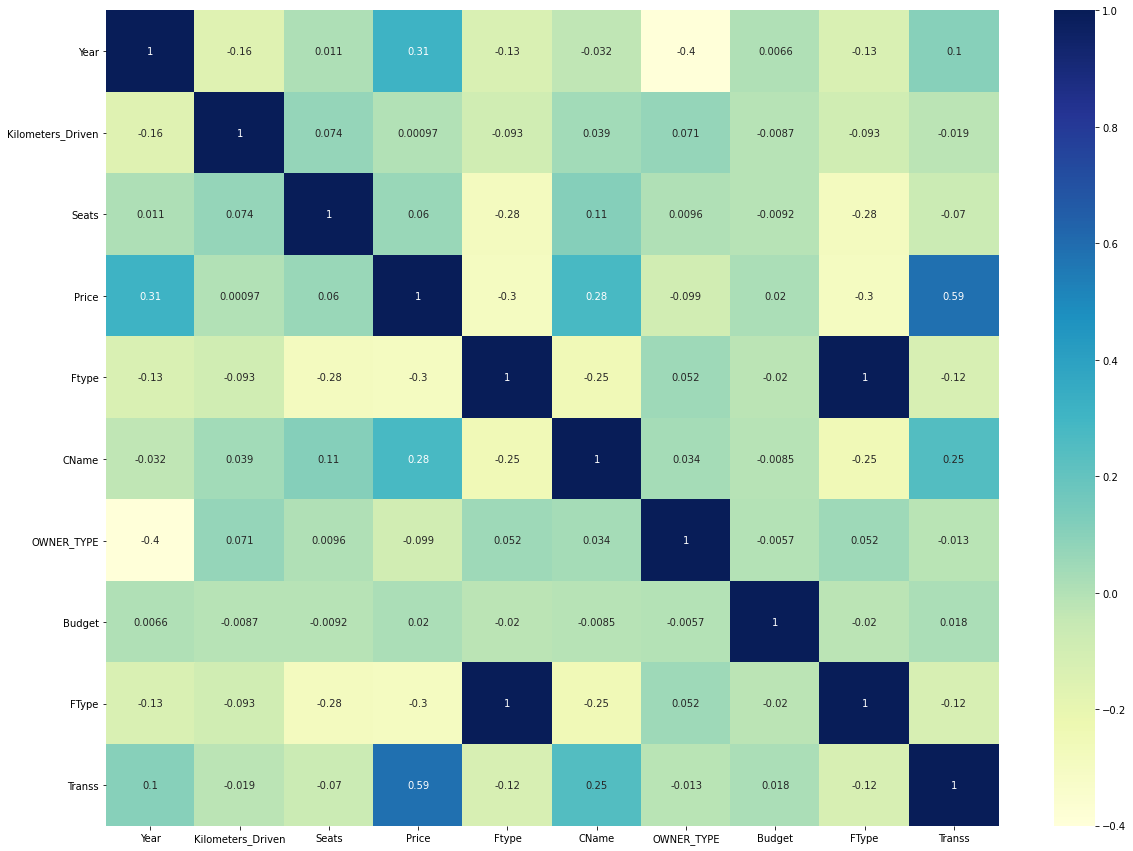

In [698]:
#Correlation using heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [699]:
reg.coef_

array([-2.87423214e-16,  0.00000000e+00,  1.54692160e-15,  1.00000000e+00,
        7.13409498e-18, -1.73972474e-16, -5.27387082e-17,  2.90985913e-18,
       -6.74369282e-18,  5.43979031e-17])

In [700]:
a = reg.predict(X_train)
a.reshape(len(a), 1)

array([[ 4.],
       [26.],
       [ 4.],
       ...,
       [ 3.],
       [ 8.],
       [ 3.]])

In [701]:
b = reg.predict(X_test)
b.reshape(len(b), 1)

array([[13.],
       [ 3.],
       [ 2.],
       ...,
       [ 3.],
       [ 4.],
       [ 4.]])

In [702]:
y_predict=reg.predict(X_test)
y_predict

array([13.,  3.,  2., ...,  3.,  4.,  4.])

In [703]:
print("coefficient of the data",reg.coef_)

coefficient of the data [-2.87423214e-16  0.00000000e+00  1.54692160e-15  1.00000000e+00
  7.13409498e-18 -1.73972474e-16 -5.27387082e-17  2.90985913e-18
 -6.74369282e-18  5.43979031e-17]


In [704]:
reg.score(X_test, y_test)

1.0